<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Subtrees_Within_Range_(Medium).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Subtrees Within Range

Write a function that takes in a Binary Search Tree (BST) and a range of integers and returns the number of subtrees in the BST that are only made up of nodes with values contained in the range.

For example, if the range is `[10, 12]`, your function should return the number of subtrees in the BST that are only made up of nodes with values 10, 11, or 12.

Each `BST` node has an integer `value`, a `left` child node, and a `right` child node. A node is said to be a valid BST node if and only if it satisfies the `BST` property: its `value` is strictly greater than the values of every node to its left; its `value` is less than or equal to the values of every node to its right; and its children nodes are either valid `BST` nodes themselves or `None` / `null`.

Sample Input

```
tree =   10
       /     \
      5      15
    /   \   /   \
   2     8 13   22
 /      / \  \
1      5   9  14
targetRange = [5, 15]
```



Sample Output

```
5
// The 5 subtrees are:
//   8    5    9    13    14
//  / \               \
// 5   9               14
```



# Solution

In [1]:
# Time = O(n)
# Space = O(d)

def subtreesWithinRange(tree, targetRange):
  tree_info = subtreesWithinRange_helper(tree, targetRange)
  return tree_info.valid_subtree_count

def subtreesWithinRange_helper(tree, targetRange):
  if tree == None:
    return TreeInfo(True, 0)
  left_tree_info = subtreesWithinRange_helper(tree.left, targetRange)
  right_tree_info = subtreesWithinRange_helper(tree.right, targetRange)
  is_valid_subtree = left_tree_info.is_valid_subtree and right_tree_info.is_valid_subtree and tree.value >= targetRange[0] and tree.value <= targetRange[1]
  if is_valid_subtree:
    valid_subtree_count = left_tree_info.valid_subtree_count + right_tree_info.valid_subtree_count + 1
  else:
    valid_subtree_count = left_tree_info.valid_subtree_count + right_tree_info.valid_subtree_count
  return TreeInfo(is_valid_subtree, valid_subtree_count)

class TreeInfo:
  def __init__(self, is_valid_subtree, valid_subtree_count):
    self.is_valid_subtree = is_valid_subtree
    self.valid_subtree_count = valid_subtree_count


# This is an input class. Do not edit.
class BST:
  def __init__(self, value):
    self.value = value
    self.left = None
    self.right = None

In [2]:
tree = BST(10)
tree.left = BST(5)
tree.right = BST(15)
tree.left.left = BST(2)
tree.left.right = BST(8)
tree.left.left.left = BST(1)
tree.left.right.left = BST(5)
tree.left.right.right = BST(9)
tree.right.left = BST(13)
tree.right.right = BST(22)
tree.right.left.right = BST(14)

targetRange = [5, 15]
subtreesWithinRange(tree, targetRange)

5

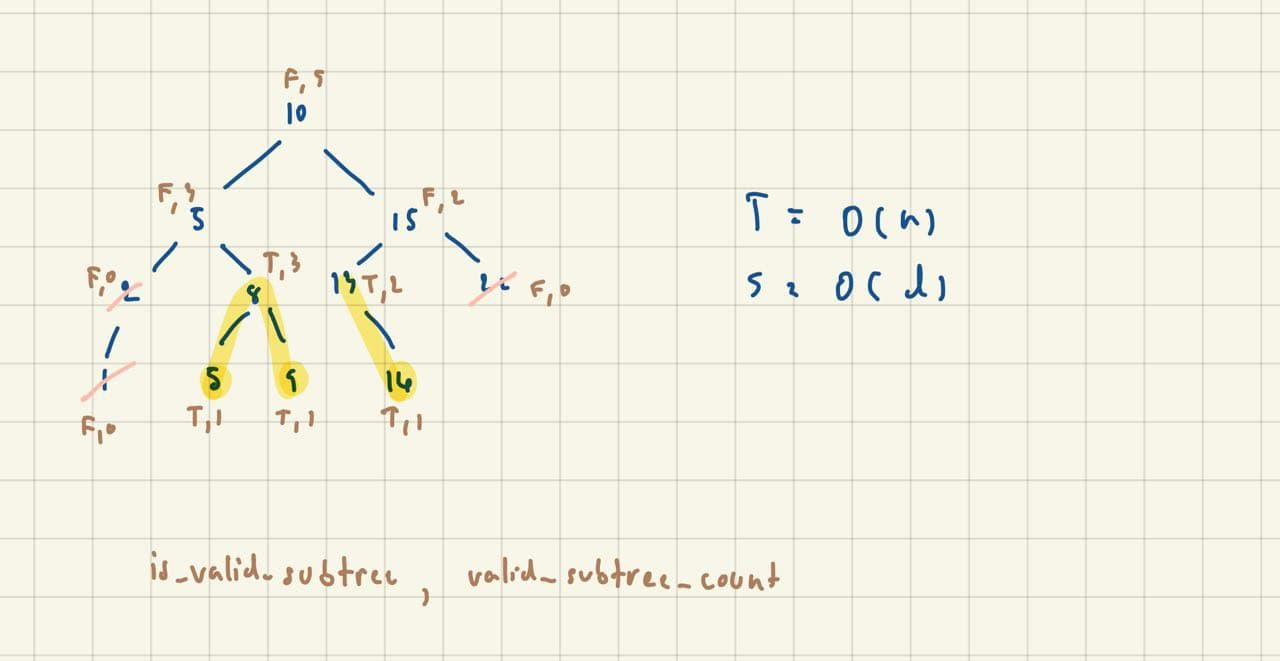